In [1]:
# importons les librairies dont nous avons besoin.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
%matplotlib inline
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Chargement des données

Pour un premier aperçu des données et afin de supprimer rapidement les colonnes inutiles pour notre algorithme, commençons par ne charger qu'un mois de notre dataset.

In [2]:
data = pd.read_csv("data/2016_01.csv")
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


# Nettoyage

Observons les colonnes qui constituent notre dataset et supprimons celles qui ne nous seront pas utiles.

In [3]:
list(data.columns)

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'UNIQUE_CARRIER',
 'AIRLINE_ID',
 'CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LA

On peut tout de suite supprimer les colonnes redondantes ou inutiles telles que YEAR, QUARTER, FL_DATE ou CARRIER et UNIQUE_CARRIER qui n'amènement pas plus d'information que AIRLINE_ID par exemple.

In [4]:
data = data.drop(columns=["YEAR", "FLIGHTS", "DISTANCE", "QUARTER", "FL_DATE", "CARRIER", "UNIQUE_CARRIER"])

Essayons de voir si certains TAIL_NUM et FL_NUM reviennent et permettraient d'identifier des types de vol.

In [5]:
print(len(data.groupby("FL_NUM").size()))
print(len(data.groupby("TAIL_NUM").size()))

6659
4238


In [6]:
data[data["FL_NUM"] == 1].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
1637,1,1,5,19805,N795AA,1,12478,1247803,31703,JFK,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,1,2,6,19805,N797AA,1,12478,1247803,31703,JFK,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,1,3,7,19805,N786AA,1,12478,1247803,31703,JFK,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1640,1,4,1,19805,N797AA,1,12478,1247803,31703,JFK,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1641,1,5,2,19805,N796AA,1,12478,1247803,31703,JFK,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On se rend compte que différents vols partagent un même TAIL_NUM ou FL_NUM, ce sont donc des variables dont nous aurons peut-être besoin par la suite. Il est trop tôt pour les supprimer.

Il n'est pas nécessaire de garder ORIGIN_AIRPORT_ID et ORIGIN_AIRPORT_SEQ_ID, choisissons donc de garder la plus complète ORIGIN_AIRPORT_ID. De même pour l'aéroport d'arrivée.

In [7]:
data = data.drop(columns=['ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID'], axis=1)

Regardons à quoi ressemblent les données des colonnes contenant le mot ORIGIN.

In [8]:
data.loc[:,'ORIGIN_AIRPORT_ID':'ORIGIN_WAC'].head()

,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
0,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
1,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
2,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
3,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
4,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74


On se rend compte que les données sont assez redondantes, il n'est donc pas nécessaire de garder d'autres colonnes qu'ORIGIN_AIRPORT_ID.

In [9]:
data = data.drop(columns=data.loc[:,'ORIGIN_CITY_MARKET_ID':'ORIGIN_WAC'].columns, axis=1)

Nous pouvons faire de même pour la destination du vol.

In [10]:
data = data.drop(columns=data.loc[:,'DEST_CITY_MARKET_ID':'DEST_WAC'].columns, axis=1)

Intéressons-nous désormais aux horaires.

In [11]:
data.loc[:,'DEP_TIME':'DEP_TIME_BLK'].head()

,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK
0,1057.0,-3.0,0.0,0.0,-1.0,1100-1159
1,1056.0,-4.0,0.0,0.0,-1.0,1100-1159
2,1055.0,-5.0,0.0,0.0,-1.0,1100-1159
3,1102.0,2.0,2.0,0.0,0.0,1100-1159
4,1240.0,100.0,100.0,1.0,6.0,1100-1159


A nouveau, de nombreuses informations sont redondantes. Surtout il n'est pas possible de connaitre le retard d'un avion avant son décollage, toutes les variables de retard ne pourrons donc pas être utilisées dans notre alogrithme. Seule l'heure de départ éstimée est à garder ici.

In [12]:
data = data.drop(columns=data.loc[:,'DEP_DELAY':'DEP_TIME_BLK'].columns, axis=1).drop(columns=['CRS_DEP_TIME'], axis=1)

Faisons de même pour l'arrivée et gardons la colonne ARR_DELAY_NEW que nous utiliserons comme variable à prédire. Nous la choisissons plutôt que la variable ARR_DELAY puisque nous ne sommes pas intéressés par le fait que des avions puissent décoller en avance.

In [13]:
data = data.drop(columns=data.loc[:,'ARR_DEL15':'ARR_TIME_BLK'].columns, axis=1).drop(columns=['CRS_ARR_TIME'], axis=1)

Supprimons désormais les colonnes dont nous n'aurons pas besoin (heure d'arrêt des roues, code d'annulation, raisons de retard...).

In [14]:
data = data.drop(columns=data.loc[:,'TAXI_OUT':'TAXI_IN'].columns, axis=1)
data = data.drop(columns=['CANCELLATION_CODE', 'DISTANCE_GROUP'], axis=1).drop(columns=data.loc[:,"CARRIER_DELAY":"LATE_AIRCRAFT_DELAY"], axis=1)

Regardons ce que contient la dernière colonne et supprimons la si besoin.

In [15]:
data["Unnamed: 64"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 64, dtype: float64

In [16]:
data[pd.notnull(data["Unnamed: 64"])]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,...,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64


In [17]:
data = data.drop(columns=["Unnamed: 64"], axis=1)

In [18]:
data.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'TAIL_NUM',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME'],
      dtype='object')

Intéressons nous aux colonnes CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME et AIR_TIME afin de comprendre en quoi elles diffèrent.

In [19]:
data.loc[:,'CRS_ELAPSED_TIME':'AIR_TIME'].head()

,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
0,158.0,155.0,132.0
1,158.0,150.0,126.0
2,158.0,170.0,135.0
3,158.0,151.0,129.0
4,158.0,171.0,137.0


La colonne AIR_TIME semble être la plus précise, décidons donc de ne garder que celle-là.

In [20]:
data = data.drop(columns=['CRS_ELAPSED_TIME', "ACTUAL_ELAPSED_TIME"], axis=1)

Enfin les colonnes FIRST_DEP_TIME, TOTAL_ADD_GTIME et LONGEST_ADD_GTIME ne seront pas disponibles avant le départ et donc pas utiles pour notre modèle.

In [21]:
data = data.drop(columns=['FIRST_DEP_TIME', "TOTAL_ADD_GTIME", 'LONGEST_ADD_GTIME', "CANCELLED", "DIVERTED", "ARR_DELAY"], axis=1)

Nous avons réduit le nombre de colonnes de 65 à 12. Afin de continuer notre analyse nous pouvons désormais charger une plus grande partie de notre dataset en fonction des colonnes sélectionnées.

In [22]:
columns = data.columns
columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'TAIL_NUM',
       'FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME',
       'ARR_TIME', 'ARR_DELAY_NEW', 'AIR_TIME'],
      dtype='object')

# Analyse exploratoire

Chargeons cette fois toutes nos données et voyons si malgré leur nombre, notre dataframe reste manipulable.

In [23]:
numbers = ["02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
for number in numbers:
    monthly_data = pd.read_csv("data/2016_{}.csv".format(number), error_bad_lines=False, low_memory=False)
    monthly_data = monthly_data.loc[:, data.columns]
    data = pd.concat([data, monthly_data], ignore_index=True)

b'Skipping line 121012: expected 65 fields, saw 75\nSkipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\nSkipping line 453858: expected 65 fields, saw 97\n'


In [24]:
all_data = data

Avant de commencer notre analyse, regardons le remplissage de nos colonnes de plus près.

In [25]:
data.notnull().mean() * 100

MONTH                100.000000
DAY_OF_MONTH         100.000000
DAY_OF_WEEK          100.000000
AIRLINE_ID           100.000000
TAIL_NUM              99.773775
FL_NUM               100.000000
ORIGIN_AIRPORT_ID    100.000000
DEST_AIRPORT_ID      100.000000
DEP_TIME              98.872636
ARR_TIME              98.793750
ARR_DELAY_NEW         98.584416
AIR_TIME              98.584398
dtype: float64

Celles-ci sont globalement bien remplies et notre dataset étant très fourni, regardons le pourcentage de données que nous perdrions en supprimant les NaN.

In [26]:
(data.shape[0] - data.dropna().shape[0]) / data.shape[0] * 100

1.415601693264239

Ce pourcentage étant faible et notre jeu de données conséquent, décidons de supprimer les valeurs manquantes. Créons une colonne DELAYED pour identifier les vols ayant subi du retard.

In [27]:
data = data.dropna()
all_data = all_data.dropna()

In [28]:
data["DELAYED"] = ((data["ARR_DELAY_NEW"] > 0) & (pd.notnull(data["ARR_DELAY_NEW"]))).astype(int)

Avant de lancer notre analyse, commençons par cleaner nos colonnes en convertissant les colonnes DAY_OF_WEEK et DAY_OF_MONTH en integer.

In [29]:
columns = ["DAY_OF_MONTH", "DAY_OF_MONTH", "ARR_TIME", "DEP_TIME"]
for column in columns:
    data[column] = data[column].astype(int)
    all_data[column] = all_data[column].astype(int)

Regardons brièvement si notre dataset comporte des vols avec des retards extrêmes.

In [30]:
all_data[all_data["ARR_DELAY_NEW"] > 500]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,ARR_DELAY_NEW,AIR_TIME
157,1,5,2,19805,N873AA,48,14107,11298,2038,2346,537.0,105.0
397,1,4,1,19805,N862AA,58,12758,12892,1155,1917,1298.0,261.0
1010,1,24,7,19805,N5DVAA,196,15024,12478,757,1051,1043.0,214.0
1812,1,7,4,19805,N348AA,6,13830,11298,1249,2337,1107.0,385.0
1990,1,16,6,19805,N862AA,14,13830,12892,1347,2040,882.0,268.0
2098,1,25,1,19805,N791AA,18,14771,12478,1202,2058,809.0,322.0
2210,1,4,1,19805,N784AA,23,12478,12892,654,1015,525.0,337.0
2916,1,26,2,19805,N438AA,168,14492,11298,623,845,703.0,175.0
3523,1,20,3,19805,N012AA,139,10397,13303,2231,18,848.0,78.0
4900,1,25,1,19805,N3NDAA,262,11298,12953,615,1018,647.0,160.0


On s'aperçoit ici que près de 3500 vols ont des retards de plus de 500 minutes, soit plus de 8h. Il sera probablement très compliqué de prédire ces vols, ce qui expliquera peut être les écarts de prédiction que nous retrouverons.

Regardons si les compagnies aériennes sont touchées de la même façon par les retards à l'aide de boxplot.

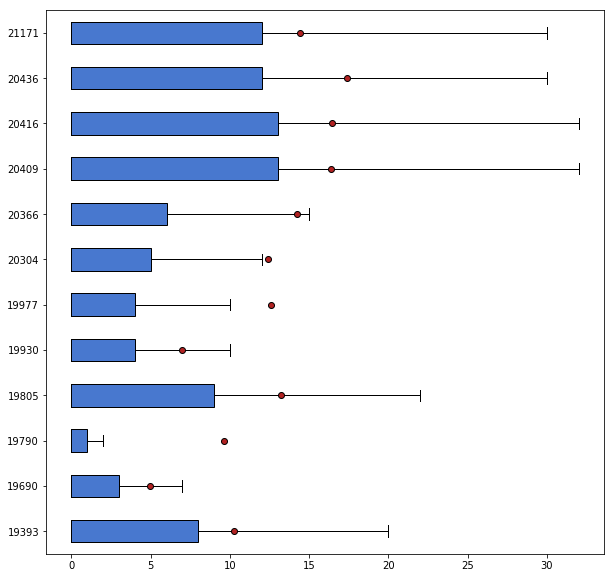

In [31]:
modalites = data.groupby("AIRLINE_ID").size().index
plt.figure(figsize=[10,10])

groupes = []
for m in modalites:
    groupes.append(data[data['AIRLINE_ID'] == m]['ARR_DELAY_NEW'].values.reshape(-1, 1))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Comme on pouvait s'y attendre, les compagnies aériennes font face à des retards très différents. Peut-être sera-t-il pertinent de créer un modèle par compagnie.

## Corrélation des variables et du retard

Essayons de comprendre quelles variables peuvent être corrélées à un retard de vol. Commençons tout d'abord par analyser les résultats pour le MONTH, DAY_OF_WEEK et DAY_OF_MONTH. Afin d'essayer de mesurer la corrélation entre ces variables et le fait qu'un vol ait été retardé ou non, regardons l'écart-type des pourcentages de vols retardés.

In [32]:
stds = {}
columns = ["MONTH", "DAY_OF_WEEK", "DAY_OF_MONTH"]

for column in columns:
    stds[column] = np.std(list(data.groupby(column).mean()["DELAYED"].sort_values()))

In [33]:
stds

{'DAY_OF_MONTH': 0.01705666536770485,
 'DAY_OF_WEEK': 0.034465184144936746,
 'MONTH': 0.042026449981374794}

On voit ici que les mois semblent avoir un impact sur le retard. En revanche le jour de la semaine ou du mois n'influent que peu. Essayons de voir quels sont les mois engendrant plus de retards.

In [34]:
data.groupby("MONTH").mean()["DELAYED"].sort_values()

MONTH
11    0.285669
2     0.296746
10    0.298753
9     0.301312
4     0.310327
1     0.328368
5     0.331246
3     0.339567
8     0.376317
6     0.383605
7     0.396873
12    0.415153
Name: DELAYED, dtype: float64

L'été et la période des fêtes de Noël sont ainsi les plus propices à engendrer du retard.

Essayons désormais de voir ce qu'il en est pour les variables TAIL_NUM, FL_NUM, ORIGIN, DEST, DEP_TIME, ARR_TIME et AIR_TIME. Afin de ne pas avoir trop de données nous ne prendrons en compte que les données apparaissant au moins 1000 fois dans notre dataset.

In [35]:
columns = ["ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID", "DEP_TIME","AIR_TIME", "ARR_TIME"]
std_dict = {}

for column in columns:
    agg_columns = data.loc[:,[column, "DELAYED"]].groupby(column).agg(['mean', 'count'])
    std_dict[column] = np.std(list(agg_columns[agg_columns["DELAYED"]["count"] > 1000 ]["DELAYED"]["mean"].sort_values()))

In [36]:
std_dict

{'AIR_TIME': 0.03659949004586052,
 'ARR_TIME': 0.1141194162282069,
 'DEP_TIME': 0.0971218497346579,
 'DEST_AIRPORT_ID': 0.0408811479225876,
 'ORIGIN_AIRPORT_ID': 0.051911966448512085}

On voit que globalement les horaires de vol ont des écarts-types importants au contraire du temps de vol par exemple. Afin de mieux visualiser cela représentons sous forme de graphes le retard moyen selon nos différentes variables.

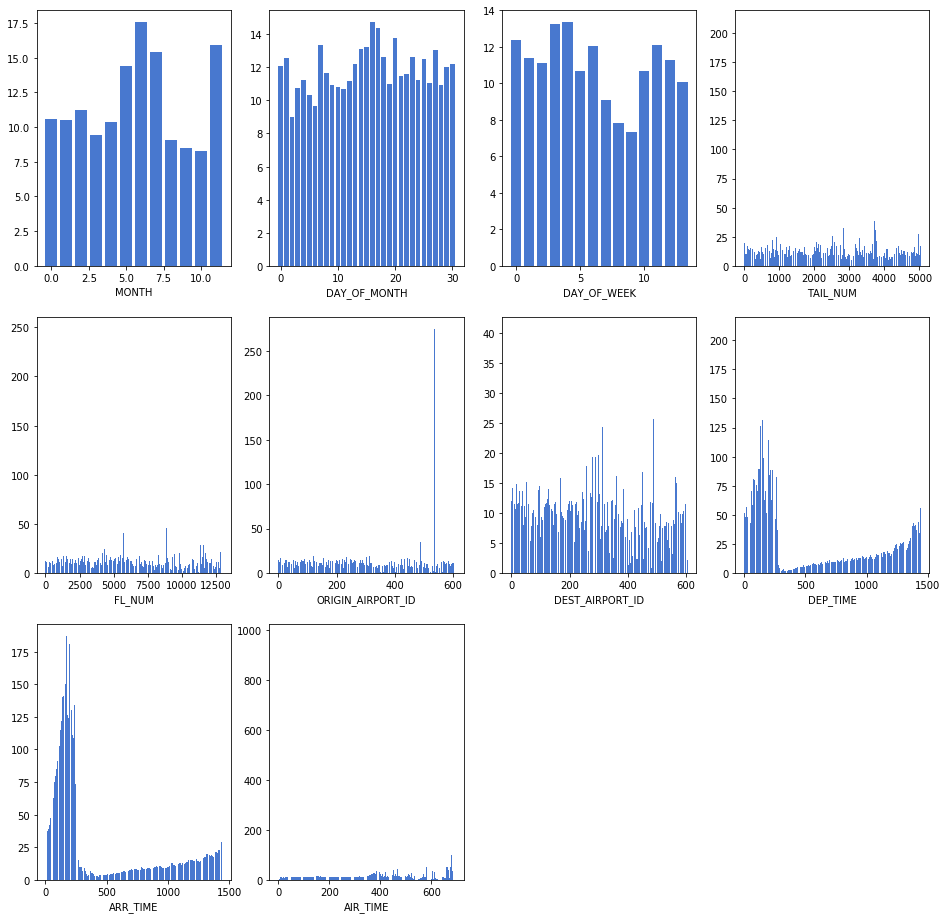

In [37]:
columns = data.loc[:, ((data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'AIRLINE_ID') & (data.columns != "DELAYED"))]
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['ARR_DELAY_NEW'].groupby(data[col]).mean()
    plt.subplot(3, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

Comme nous l'avions vu auparavant, les horaires de vol ainsi que le mois du vol semblent être les variables les plus corrélées au temps de retard d'un avion.

Regardons désormais la proportion de retard plutôt que le temps de retard moyen.

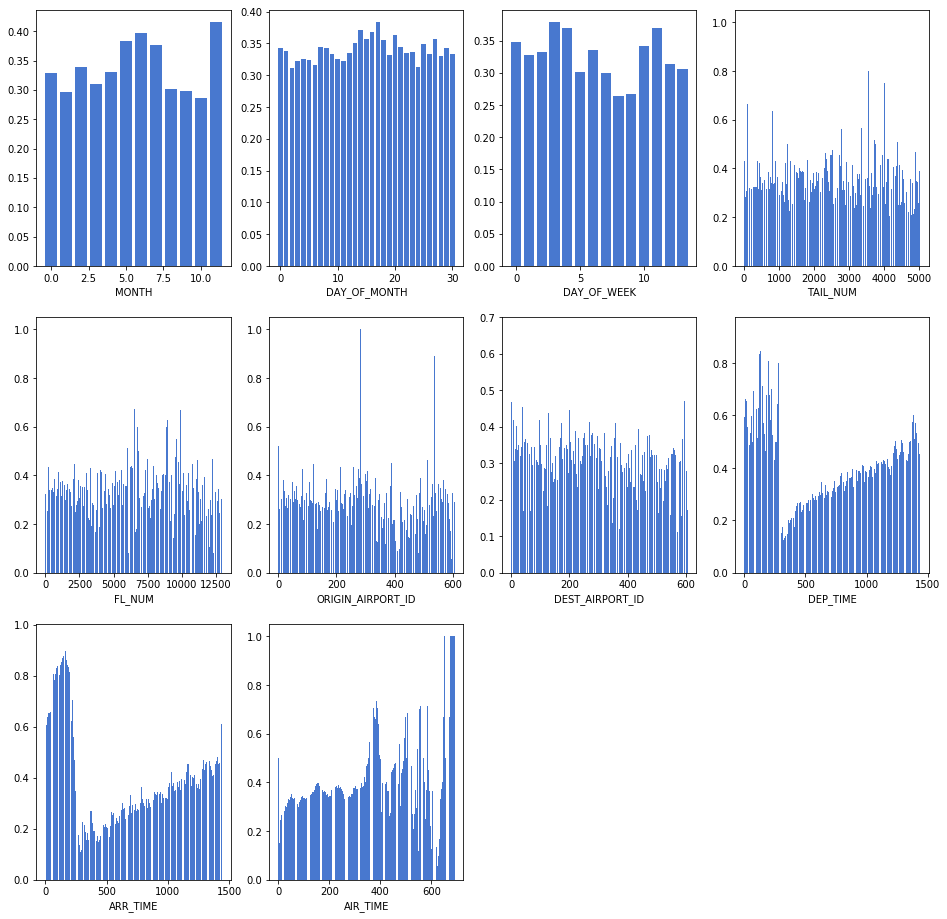

In [38]:
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['DELAYED'].groupby(data[col]).mean()
    plt.subplot(3, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

On s'aperçoit que des tendances se dessinent de nouveau pour les colonnes DEP_TIME, AIR_TIME et ARR_TIME. Par exemple les vols dont le temps d'arrivée est inférieur à 220 semblent être plus souvent en retard que les autres.

Il pourrait être donc pertinent de créer des colonnes booléennes indiquant ou non la présence de ces variables dans certains ranges de chiffre. C'est donc ici le début du feature engineering.

## Feature engineering

Il est désormais temps de préparer notre dataset pour notre modèle. Toutefois celui-ci étant très gros n'est pas très manipulable, prenons donc le parti de le diviser en plusieurs datasets, afin que chaque dataset ne représente qu'une compagnie aérienne.

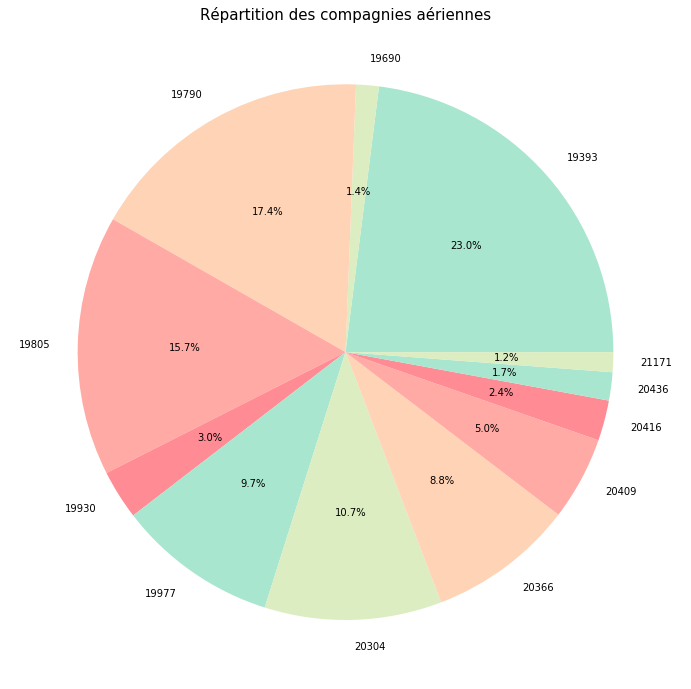

In [39]:
airlines = data.groupby("AIRLINE_ID").size()
figure = plt.figure(figsize=[12,12])
plt.title("Répartition des compagnies aériennes",fontsize=15)
plt.axis('equal')
labels = airlines.index
sizes = airlines.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["#a8e6cf", "#dcedc1", "#ffd3b6", "#ffaaa5", "#ff8b94"])
plt.show()

Focalisons nous ici sur la compagnie aérienne 19930 qui comporte 165641 vols et représente plus de 3% du dataset.

In [40]:
airlines = data["AIRLINE_ID"].unique()
airlines_data = []
for airline in airlines:
    airline_data = data[data["AIRLINE_ID"] == airline]
    airlines_data.append(airline_data)

In [41]:
data = airlines_data[1]
data = data.drop(columns=["AIRLINE_ID"], axis=1)

Commençons par voir si transformer nos horaires en minutes et ajouter un effet cyclique permet d'améliorer les tendances que nous avons notées auparavant.

In [42]:
def convert_to_min(x):
    if len(x) < 4:
        x = "0" * (4-len(x)) + x
    if x[:2] == "24":
        x = "00" + x[2:]
    try:
        time = pd.to_datetime(x, format='%H%M')
        return time.hour * 60 + time.minute
    except Exception:
        return int(x)

In [43]:
columns = ["ARR_TIME", "DEP_TIME"]
hours_in_day = 24*60

for column in columns:
    data[column] = data[column].astype(int).astype(str)
    data[column] = data[column].apply(convert_to_min)
    data['SIN_{}'.format(column)] = np.sin(2*np.pi*data[column]/hours_in_day)
    data['COS_{}'.format(column)] = np.cos(2*np.pi*data[column]/hours_in_day)
    all_data[column] = all_data[column].astype(int).astype(str)
    all_data[column] = all_data[column].apply(convert_to_min)
    all_data['SIN_{}'.format(column)] = np.sin(2*np.pi*all_data[column]/hours_in_day)
    all_data['COS_{}'.format(column)] = np.cos(2*np.pi*all_data[column]/hours_in_day)

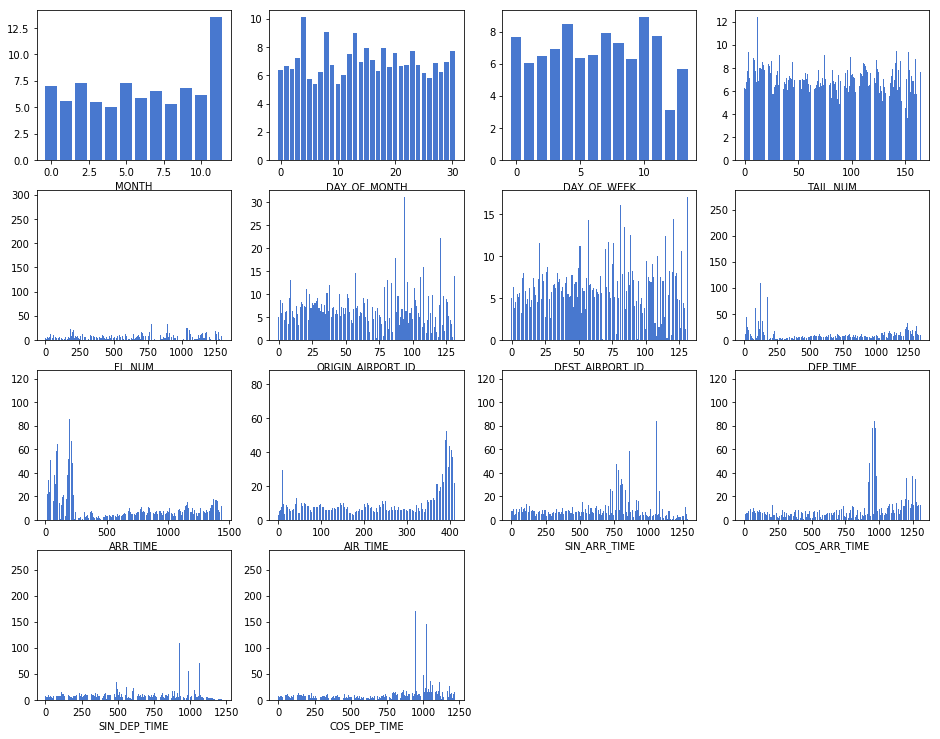

In [44]:
columns = data.loc[:, ((data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'AIRLINE_ID') & (data.columns != "DELAYED"))]
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['ARR_DELAY_NEW'].groupby(data[col]).mean()
    plt.subplot(5, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

La conversion ne semble pas amener de modifications majeures à ce que nous avions pu voir. Ajoutons donc comme discuté précédemment des variables booléennes indiquant la présence d'horaires particuliers.

In [45]:
data = data.drop(columns=["SIN_ARR_TIME", "SIN_DEP_TIME", "COS_ARR_TIME", "COS_DEP_TIME"], axis=1)
all_data = all_data.drop(columns=["SIN_ARR_TIME", "SIN_DEP_TIME", "COS_ARR_TIME", "COS_DEP_TIME"], axis=1)

In [46]:
data["DEP_0_280"] = (data["DEP_TIME"] < 280).astype(int)
data["ARR_0_220"] = (data["ARR_TIME"] < 220).astype(int)
data["AIR_0_360"] = (data["AIR_TIME"] < 350).astype(int)

Vérifions que cet extrait de notre dataset confirme ce que nous avions pu visualiser précédemment.

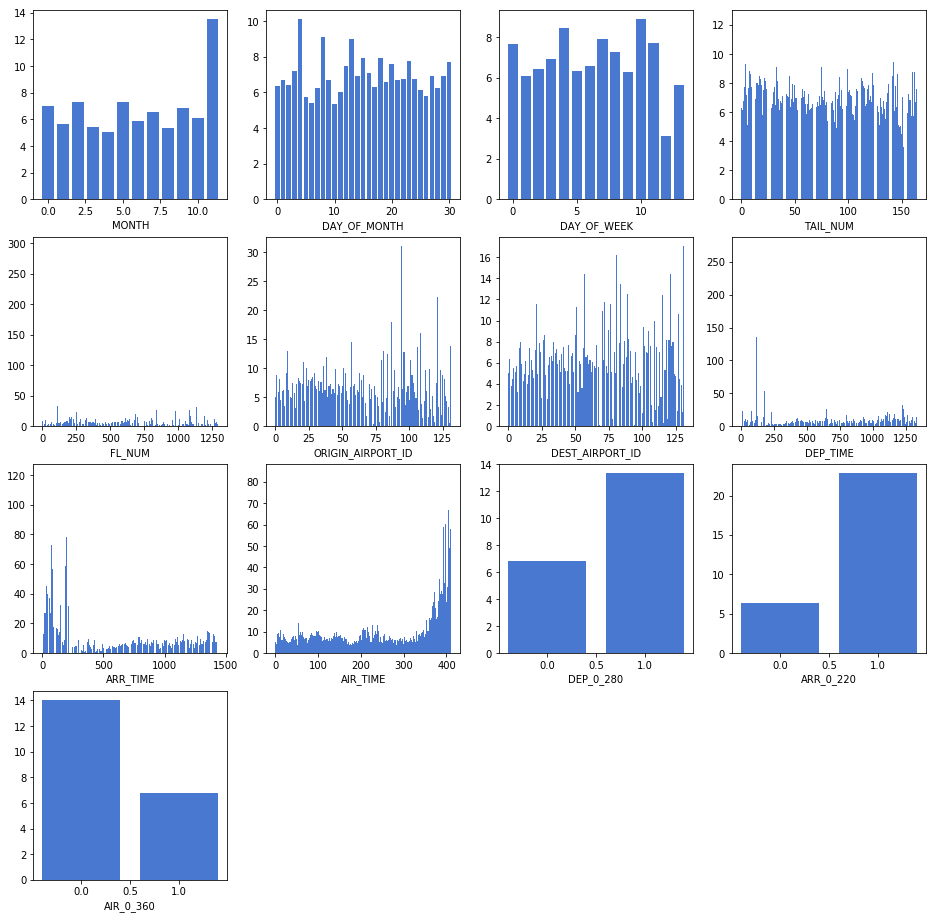

In [47]:
columns = data.loc[:, ((data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'AIRLINE_ID') & (data.columns != "DELAYED"))]
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['ARR_DELAY_NEW'].groupby(data[col]).mean()
    plt.subplot(4, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

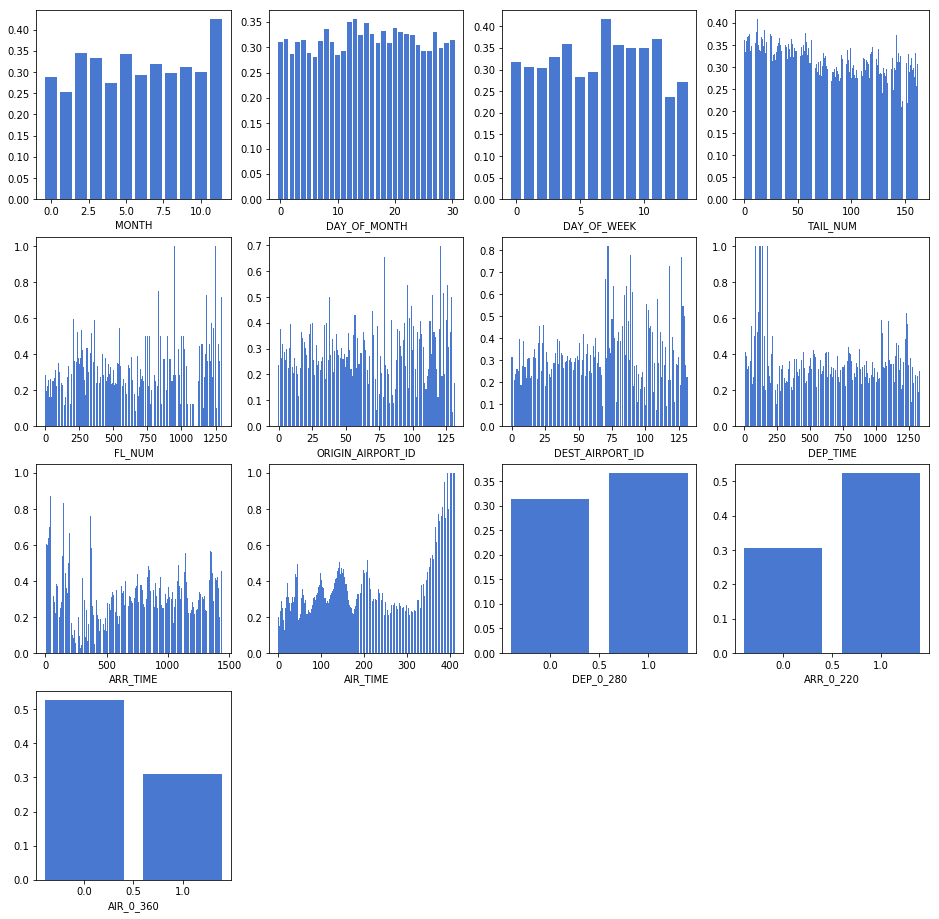

In [48]:
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['DELAYED'].groupby(data[col]).mean()
    plt.subplot(4, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

Ces graphes confirment l'intérêt d'ajouter ces variables booléennes à notre dataset. Afin d'en profiter pleinement, nous pouvons ajouter une nouvelle variable prenant en compte notre variable booléenne et celles des horaires de vol.

In [49]:
data["DEP_0_280_TIME"] = (1 - data["DEP_0_280"]) * data["DEP_TIME"]
data["ARR_0_220_TIME"] = (1 - data["ARR_0_220"]) * data["ARR_TIME"]
data["AIR_0_360_TIME"] = (1 - data["AIR_0_360"]) * data["AIR_TIME"]

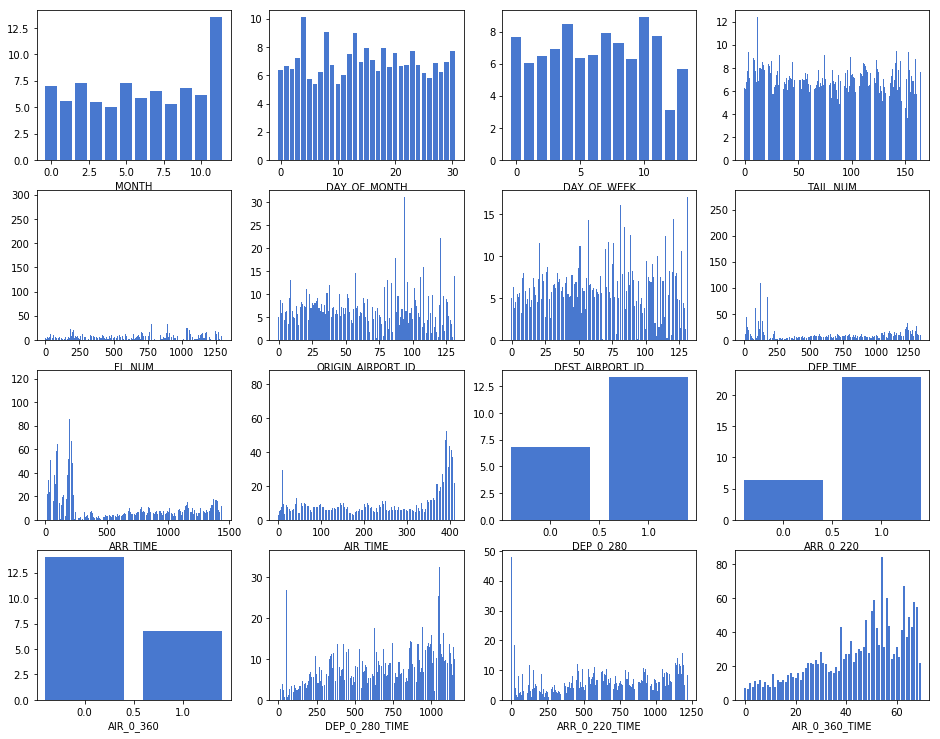

In [50]:
columns = data.loc[:, ((data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'ARR_DELAY_NEW') & (data.columns != 'AIRLINE_ID') & (data.columns != "DELAYED"))]
plt.figure(figsize=[16,16])
i = 0
              
for col in columns:
    i+=1
    mean = data['ARR_DELAY_NEW'].groupby(data[col]).mean()
    plt.subplot(5, 4, i)
    plt.bar(range(len(data[col].unique())),mean)
    plt.xlabel(col)

In [51]:
all_data["DEP_0_280"] = (all_data["DEP_TIME"] < 280).astype(int)
all_data["ARR_0_220"] = (all_data["ARR_TIME"] < 220).astype(int)
all_data["AIR_0_360"] = (all_data["AIR_TIME"] < 350).astype(int)
all_data["DEP_0_280_TIME"] = (1 - all_data["DEP_0_280"]) * all_data["DEP_TIME"]
all_data["ARR_0_220_TIME"] = (1 - all_data["ARR_0_220"]) * all_data["ARR_TIME"]
all_data["AIR_0_360_TIME"] = (1 - all_data["AIR_0_360"]) * all_data["AIR_TIME"]

In [52]:
data = data.drop(columns=["DELAYED"], axis=1)

Nous pouvons désormais sauvegarder ces datasets avec les colonnes modifiées. Il est à noter que nous commencerons par travailler sur notre modèle à partir des données de la compagnie aérienne 19930 avant d'étendre ce travail à l'ensemble de notre dataset.

In [53]:
data.to_csv("clean_data.csv", columns=data.columns, encoding="utf-8", index=False)
all_data.to_csv("clean_all_data.csv", columns=all_data.columns, encoding="utf-8", index=False)